- Analyse the gaming's industry net market worth over the years
- Which publisher is having the most success in terms of total revenue from the games they have published?
- Which genre(s) is the up and coming among gamers?
- For this publisher, did they focus more on a genre to earn revenue? Or was their success attributed purely to the contents of the game?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('mobile-games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             104 non-null    object
 1   Revenue          104 non-null    int64 
 2   Initial release  104 non-null    object
 3   Publisher(s)     104 non-null    object
 4   Genre(s)         104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [3]:
df['Revenue'] = df['Revenue']/1000000000
df.rename(columns = {'Revenue': 'Revenue(Bil)'},inplace = True) 
df.head(10)

,Game,Revenue(Bil),Initial release,Publisher(s),Genre(s)
0,Honor of Kings / Arena of Valor,14.66750,2015-11-26,Tencent Games,MOBA
1,Monster Strike,10.00000,2013-08-08,Mixi,Puzzle / RPG / Strategy
2,PUBG Mobile,9.00000,2018-03-19,Tencent Games / Krafton / VNG Games,Battle royale
3,Puzzle & Dragons,8.57834,2012-02-20,GungHo Online Entertainment,RPG / Puzzle
4,Clash of Clans,8.00000,2012-08-02,Supercell (Tencent),Strategy
5,Pokémon Go,7.76000,2016-07-06,Niantic / The Pokémon Company,Augmented reality
6,Candy Crush Saga,7.45600,2012-11-14,King (Activision Blizzard),Puzzle
7,Fate/Grand Order,6.30000,2015-07-30,Aniplex (Sony Music Entertainment Japan),RPG
8,Fantasy Westward Journey,4.70000,2015-03-26,NetEase,MMORPG
9,Garena Free Fire,4.33000,2017-12-04,Garena,Battle royale


# Problem 1: Analyse the gaming's industry net market worth over the years

In [4]:
release_revenue = pd.to_datetime(df['Initial release']).to_frame()
release_revenue['revenue'] = df['Revenue(Bil)']
# We create a Dataframe that contains the initial release date and the revenue earned
# from the release of that game. At the same time, we convert the 'Initial release'
# column into a DateTime datatype so that we can extract the years or months easily for
# the next few steps

In [5]:
release_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Initial release  104 non-null    datetime64[ns]
 1   revenue          104 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [6]:
release_revenue['year'] = release_revenue['Initial release'].dt.strftime('%Y')
# We use the strftime method to extract the years of each row and append it into a new column
# called 'year'
release_revenue = release_revenue.groupby('year').revenue.sum().reset_index()
# We groupby the total revenue earned for each year so that we can see how much
# revenue is generated from games in total for each year

In [7]:
release_revenue['rolling_revenue'] = release_revenue['revenue'].cumsum()
# We add this line of code so that we can calulate the rolling sum of the revenue after each
# year, since we are interested in the total market value of the games indsutry

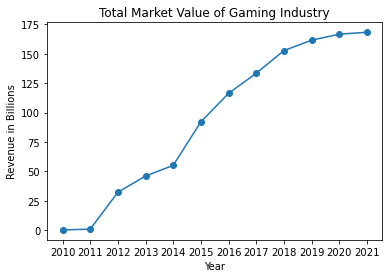

,year,revenue,rolling_revenue
0,2010,0.400000,0.400000
1,2011,0.649000,1.049000
2,2012,31.318440,32.367440
3,2013,13.800000,46.167440
4,2014,9.037200,55.204640
5,2015,36.954600,92.159240
6,2016,24.133510,116.292750
7,2017,17.065720,133.358470
8,2018,19.222000,152.580470
9,2019,8.845920,161.426390


In [8]:
lineplot = plt.plot(release_revenue.year,release_revenue.rolling_revenue, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Revenue in Billions')
plt.title('Total Market Value of Gaming Industry')
plt.show()
release_revenue

# Problem 1 Conclusion

We can see that the value of the gaming industy has increased exponentially from 2010 to 2019, increasing from 0.4 Billion to 161 Billion. The growth then slowed down from 2019 onwards, to date 2021, from 161 Billion to 168 Billion.

# Problem 2: Which publisher is having the most success in terms of total revenue from the games they have published?

In [9]:
df_publisher_revenues = df.groupby('Publisher(s)')['Revenue(Bil)'].sum()

In [10]:
df_publisher_revenues = df_publisher_revenues.to_frame().reset_index()

In [11]:
df_publisher_revenues

,Publisher(s),Revenue(Bil)
0,37Games,0.1510
1,Activision / Tencent / Garena,1.5000
2,Alibaba Group,0.1616
3,Alibaba Group / Koei Tecmo,1.9362
4,Aniplex (Sony Music Entertainment Japan),6.3000
...,...,...
66,Tencent Games / Garena,0.9450
67,Tencent Games / Krafton / VNG Games,9.0000
68,Topwar Studio,0.1920
69,Yotta Games,0.1000


In [12]:
df_publisher_revenues['str_split'] = df_publisher_revenues['Publisher(s)'].str.split('/')
df_publisher_revenues['publisher1'] = df_publisher_revenues.str_split.str.get(0)
df_publisher_revenues['publisher2'] = df_publisher_revenues.str_split.str.get(1)
df_publisher_revenues['publisher3'] = df_publisher_revenues.str_split.str.get(2)
# We use this code to break down all the publishers into different columns

In [13]:
df_publisher_revenues_full = pd.DataFrame({'publisher1':df_publisher_revenues['publisher1'],\
                                          'publisher2':df_publisher_revenues['publisher2'],\
                                         'publisher3':df_publisher_revenues['publisher3'],\
                                         'revenue_billions':df_publisher_revenues['Revenue(Bil)']})
# This will give us different columns of publishers
# From here on, we designate each publisher to get the same total revenue
# For example, Activision, Tencent and Garena worked together and earned 1500M,
# we would set the data as though each of them worked alone and earned 1500M

In [14]:
df_publisher_revenues_1 = pd.DataFrame({'publisher':df_publisher_revenues_full['publisher1'],\
                                            'revenue_billions':df_publisher_revenues_full['revenue_billions']})
df_publisher_revenues_2 = pd.DataFrame({'publisher':df_publisher_revenues_full['publisher2'],\
                                            'revenue_billions':df_publisher_revenues_full['revenue_billions']})
df_publisher_revenues_3 = pd.DataFrame({'publisher':df_publisher_revenues_full['publisher3'],\
                                            'revenue_billions':df_publisher_revenues_full['revenue_billions']})

In [15]:
df_publisher_revenues_final = pd.merge(df_publisher_revenues_1,df_publisher_revenues_2, how = 'outer')

In [16]:
df_publisher_revenues_final = pd.concat([df_publisher_revenues_final,df_publisher_revenues_3])

In [17]:
df_publisher_revenues_final

,publisher,revenue_billions
0,37Games,0.1510
1,Activision,1.5000
2,Alibaba Group,0.1616
3,Alibaba Group,1.9362
4,Aniplex (Sony Music Entertainment Japan),6.3000
...,...,...
66,NaN,0.9450
67,VNG Games,9.0000
68,NaN,0.1920
69,NaN,0.1000


In [18]:
df_publisher_revenues_final = df_publisher_revenues_final.dropna().reset_index(drop = True)
#Over here, we would have our final table, of each publisher with their earned revenue
pd.set_option('display.max_rows', None)

In [19]:
df_publisher_revenues_final['publisher'] = df_publisher_revenues_final.publisher.apply(lambda x: x.strip())
# Upon inspection, some of the publisher names had whitespaces in them
# We use the strip function to correct this so we can use groupby

In [20]:
df_publisher_final = df_publisher_revenues_final.groupby('publisher').revenue_billions.sum()
df_publisher_final = df_publisher_final.sort_values(ascending = False).reset_index()
df_publisher_final = df_publisher_final[:5]
# Since there are too many companies to visualise the top grossing publishers, we look at just the top 5

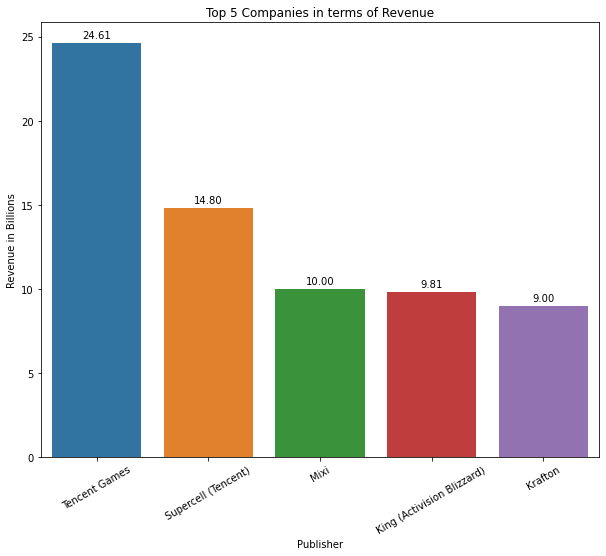

<Figure size 432x288 with 0 Axes>

In [21]:
publisher = [i for i in df_publisher_final['publisher']]
revenue = [i for i in df_publisher_final['revenue_billions']]
plt.figure(figsize=(10,8))
ax = plt.subplot()
ax.set_xticks(range(5))
ax.set_xticklabels(publisher,rotation = 30)
plot = sns.barplot(x = 'publisher', y = 'revenue_billions', data = df_publisher_final)
# for loop below is to annotate the barplot so we can see the figures accurately
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Publisher')
plt.ylabel('Revenue in Billions')
plt.title('Top 5 Companies in terms of Revenue')
plt.show()
plt.clf()

# Problem 2 Conclusion

Tencent is the leading publisher for games, followed by Mixi, King and Krafton. There is a significance difference between the total revenue earned by Tencent, since it occupies the top 2 position in terms of revenue. It has the biggest lead compared to it's competitors

# Problem 3: Which genre(s) is the up and coming among gamers?

In [22]:
df_genres = df[['Genre(s)','Revenue(Bil)']]
df_genres

,Genre(s),Revenue(Bil)
0,MOBA,14.667500
1,Puzzle / RPG / Strategy,10.000000
2,Battle royale,9.000000
3,RPG / Puzzle,8.578340
4,Strategy,8.000000
5,Augmented reality,7.760000
6,Puzzle,7.456000
7,RPG,6.300000
8,MMORPG,4.700000
9,Battle royale,4.330000


In [23]:
df_genres['str_split'] = df_genres['Genre(s)'].str.split('/')
df_genres['genre1'] = df_genres.str_split.str.get(0)
df_genres['genre2'] = df_genres.str_split.str.get(1)
df_genres['genre3'] = df_genres.str_split.str.get(2)
# We use this code to break down all the genres into different columns

<ipython-input-23-a5088635a681>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['str_split'] = df_genres['Genre(s)'].str.split('/')
<ipython-input-23-a5088635a681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['genre1'] = df_genres.str_split.str.get(0)


In [24]:
df_genres_full = pd.DataFrame({'genre1':df_genres['genre1'],\
                                   'genre2':df_genres['genre2'],\
                                   'genre3':df_genres['genre3'],\
                                   'revenue':df_genres['Revenue(Bil)']})
# Similar to the previous problem, this gives us different columns of genres
# The next step would be to create separate DataFrames for each column first

In [25]:
df_genres_1 = pd.DataFrame({'genre':df_genres_full['genre1'],\
                                'revenue':df_genres_full['revenue']})
df_genres_2 = pd.DataFrame({'genre':df_genres_full['genre2'],\
                                'revenue':df_genres_full['revenue']})
df_genres_3 = pd.DataFrame({'genre':df_genres_full['genre3'],\
                                'revenue':df_genres_full['revenue']})
# The next step would be to combine the DataFrames

In [26]:
df_genres_final = pd.concat([df_genres_1,df_genres_2,df_genres_3]).dropna().reset_index(drop = True)
# Now we have our final DataFrame with every genre of games after 2015, we can form visualisations now

In [27]:
df_genres_final['genre'] = df_genres_final.genre.apply(lambda x: x.strip())
# Remove any whitespaces after we inspected the spelling inconsistencies in the genre column

In [28]:
df_genres_final.replace('MMOR)','MMOR',inplace = True)
df_genres_final.replace('Racing (Kart','Racing (Kart)',inplace = True)
df_genres_final.replace('Real-time strategy','Real Time Strategy',inplace = True)
# There are a few spelling inconsistencies in the genre column, after inspecting the column,
# we make the necessary replacements

In [29]:
df_genres_final = df_genres_final.groupby('genre').revenue.sum()
df_genres_final = df_genres_final.to_frame().reset_index().sort_values('revenue', ascending = False)
df_genres_final_top5 = df_genres_final[:5]
df_genres_final_top5.reset_index(drop = True)
# We obtain the top 5 best revenue generating genres, so let's visualise that

,genre,revenue
0,Puzzle,43.13544
1,RPG,35.71754
2,Strategy,28.78510
3,MOBA,17.85350
4,Battle royale,17.51527


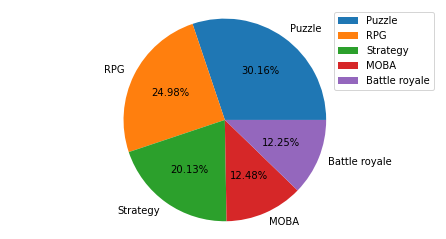

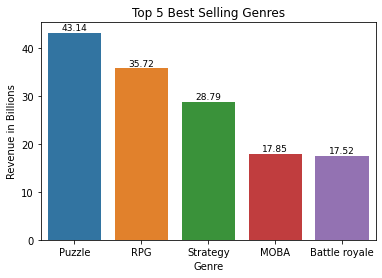

In [30]:
plt.subplot(1,1,1)
plt.pie(df_genres_final_top5['revenue'], \
        labels = df_genres_final_top5['genre'],\
       autopct = '%0.2f%%')
plt.axis('equal')
plt.legend(df_genres_final_top5['genre'], bbox_to_anchor=(1,1),loc = 'upper right')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.show()
plt.subplot(2,1,2)
ax = plt.subplot()
ax.set_xticks(range(5))
ax.set_xticklabels(df_genres_final_top5['genre'])
plot = sns.barplot(x = 'genre', y = 'revenue', data = df_genres_final_top5)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.xlabel('Genre')
plt.ylabel('Revenue in Billions')
plt.title('Top 5 Best Selling Genres')
plt.show()

# Problem 3 Conclusion

Most popular genre among gamers right now is Puzzle, followed by RPG, then Strategy. We can also see the amount of revenue that they have generated from the bar plot below.
Hence, companies that wish to make revenue from these group of gamers after 2015, can choose to focus on these genres since they are currently more popular with the gaming community.

# Problem 4: For the publisher found in Problem 2, did they focus more on a genre to earn revenue? Or was their success attributed purely to the contents of the game?¶

In [31]:
df_publisher_genre = df[['Publisher(s)','Genre(s)']]
df_publisher_genre['str_split'] = df_publisher_genre['Publisher(s)'].str.split('/')
df_publisher_genre['publisher1'] = df_publisher_genre.str_split.str.get(0)
df_publisher_genre['publisher2'] = df_publisher_genre.str_split.str.get(1)
df_publisher_genre['publisher3'] = df_publisher_genre.str_split.str.get(2)
df_publisher_genre['str_split2'] = df_publisher_genre['Genre(s)'].str.split('/')
df_publisher_genre['genre1'] = df_publisher_genre.str_split2.str.get(0)
df_publisher_genre['genre2'] = df_publisher_genre.str_split2.str.get(1)
df_publisher_genre['genre3'] = df_publisher_genre.str_split2.str.get(2)
# We use this code to break down all the publishers and genres into different columns

<ipython-input-31-28a982300d17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publisher_genre['str_split'] = df_publisher_genre['Publisher(s)'].str.split('/')
<ipython-input-31-28a982300d17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publisher_genre['publisher1'] = df_publisher_genre.str_split.str.get(0)


In [32]:
df_publisher_genre_1 = pd.DataFrame({'publisher':df_publisher_genre['publisher1'],\
                                    'genre':df_publisher_genre['genre1']})
df_publisher_genre_2 = pd.DataFrame({'publisher':df_publisher_genre['publisher2'],\
                                    'genre':df_publisher_genre['genre2']})
df_publisher_genre_3 = pd.DataFrame({'publisher':df_publisher_genre['publisher3'],\
                                    'genre':df_publisher_genre['genre3']})
df_publisher_genre_final = pd.concat([df_publisher_genre_1,df_publisher_genre_2,\
                                      df_publisher_genre_3]).dropna().reset_index(drop = True)
# We combine the different DataFrames into 1 big DataFrame that has every Publisher
# and the genre

In [33]:
df_publisher_genre_tencent = df_publisher_genre_final[df_publisher_genre_final.publisher.str.match('.*Tencent.*')]
# This regex matching give us every publisher that is under Tencent

In [34]:
df_publisher_genre_tencent.genre.value_counts()
# This shows us the number of games with the specified genres that Tencent made

MOBA                  3
Strategy              2
Real-time strategy    1
Battle royale         1
Racing (Kart          1
 Battle royale        1
Simulation            1
Name: genre, dtype: int64

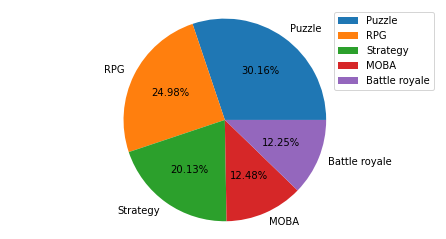

In [35]:
plt.pie(df_genres_final_top5['revenue'], \
        labels = df_genres_final_top5['genre'],\
       autopct = '%0.2f%%')
plt.axis('equal')
plt.legend(df_genres_final_top5['genre'], bbox_to_anchor=(1,1),loc = 'upper right')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.show()

# Problem 4 Conclusion

We can say that Tencent produced games whose genres were popular within the gaming community as MOBA and strategy, which were the top 2 produced genres from Tencent, are part of the top 5 popular genres in the gaming community. 